# **Import Libraries**

In [41]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

%matplotlib widget

# **Utils**

In [42]:
def show_equations(A, b):
    """
    Display the system Ax = b as symbolic equations using SymPy.
    """
    n, m = A.shape
    x = sp.symbols(f'x1:{m+1}')  # creates (x1, x2, ..., xm)
    equations = []

    for i in range(n):
        lhs = sum(A[i, j] * x[j] for j in range(m))
        rhs = b[i, 0]
        equations.append(sp.Eq(lhs, rhs))

    print("System of equations:")
    for eq in equations:
        display(eq)

    A = sp.Matrix(A)
    b = sp.Matrix(b)

    # Build augmented matrix
    Ab = A.row_join(b)

    print("Augmented matrix form [A | b]:")
    display(Ab)


def gauss_jordan(A, b):
    Ab = sp.Matrix(np.hstack([A, b]))
    rref_matrix, _ = Ab.rref() 
    solution = rref_matrix[:, -1]
    
    print(f"\nResult:")
    display(solution)

def show_equations(A, b):
    """
    Display the system Ax = b as symbolic equations using SymPy.
    """
    n, m = A.shape
    x = sp.symbols(f'x1:{m+1}')  # creates (x1, x2, ..., xm)
    equations = []

    for i in range(n):
        lhs = sum(A[i, j] * x[j] for j in range(m))
        rhs = b[i, 0]
        equations.append(sp.Eq(lhs, rhs))

    print("System of equations:")
    for eq in equations:
        display(eq)

    A = sp.Matrix(A)
    b = sp.Matrix(b)

    # Build augmented matrix
    Ab = A.row_join(b)

    print("Augmented matrix form [A | b]:")
    display(Ab)


def gauss_jordan(A, b):
    Ab = sp.Matrix(np.hstack([A, b]))
    rref_matrix, _ = Ab.rref() 
    solution = rref_matrix[:, -1]
    
    print(f"\nResult:")
    display(solution)

def plotting_2D_solution(A, b):
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif"
    })

    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    x = np.linspace(-10, 10, 400)

    try:
        sol = np.linalg.solve(A, b)
        print(f"One solution {sol.flatten()}")
        display(sp.Matrix(sol))
    except np.linalg.LinAlgError:
        rank_A, rank_Ab = np.linalg.matrix_rank(A), np.linalg.matrix_rank(np.c_[A,b])
        sol = None
        print(f"{'Infinite solutions' if rank_A==rank_Ab else 'No solution'}")

    # Symbolic equations for labels
    x1, x2 = sp.symbols("x y")
    eq1 = sp.Eq(A[0,0]*x1 + A[0,1]*x2, b[0,0])
    eq2 = sp.Eq(A[1,0]*x1 + A[1,1]*x2, b[1,0])

    y1 = (b[0,0] - A[0,0]*x) / A[0,1]
    y2 = (b[1,0] - A[1,0]*x) / A[1,1]

    ax.plot(x, y1, label=f"${sp.latex(eq1)}$", color="blue")
    ax.plot(x, y2, label=f"${sp.latex(eq2)}$", color="red")

    if sol is not None:
        ax.plot(sol[0,0], sol[1,0], "go", label="Solution")

    # Keep full border (all spines visible)
    for spine in ax.spines.values():
        spine.set_visible(True)

    # Add central axis lines
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)

    # Remove ticks from border, only keep on central axes
    ax.tick_params(axis="both", which="both", bottom=False, top=False,
                   left=False, right=False)

    # Manual ticks on axes


    ax.set_aspect("equal", adjustable="box")
    ax.legend(fontsize=12)
    plt.show()


def plotting_3D_solution(A, b):
    try:
        sol = np.linalg.solve(A, b)
        print(f"One solution {sol.flatten()}")
        display(sp.Matrix(sol))
    except np.linalg.LinAlgError:
        rank_A, rank_Ab = np.linalg.matrix_rank(A), np.linalg.matrix_rank(np.c_[A,b])
        sol = None
        print(f"{'Infinite solutions' if rank_A==rank_Ab else 'No solution'}")

    fig = plt.figure(figsize=(10,10), dpi=100)
    ax = fig.add_subplot(111, projection='3d')

    # Grid
    x_vals = np.linspace(-10, 10, 50)
    y_vals = np.linspace(-10, 10, 50)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Equations
    x1, x2, x3 = sp.symbols("x y z")
    equations = [
        sp.Eq(A[0,0]*x1 + A[0,1]*x2 + A[0,2]*x3, b[0,0]),
        sp.Eq(A[1,0]*x1 + A[1,1]*x2 + A[1,2]*x3, b[1,0]),
        sp.Eq(A[2,0]*x1 + A[2,1]*x2 + A[2,2]*x3, b[2,0])
    ]

    colors = ["blue", "red", "green"]
    for i in range(3):
        if A[i,2] != 0:
            Z = (b[i,0] - A[i,0]*X - A[i,1]*Y) / A[i,2]
            ax.plot_surface(X, Y, Z, alpha=0.5, color=colors[i])
        else:
            Z = np.zeros_like(X)
            ax.plot_surface(X, Y, Z, alpha=0.5, color=colors[i])

    # Solution point
    if sol is not None:
        ax.scatter(sol[0,0], sol[1,0], sol[2,0], color="black", s=50, label="Solution")

    # 3D axes lines through origin
    axis_limit = 10
    ax.plot([-axis_limit, axis_limit], [0, 0], [0, 0], color="black")  # x-axis
    ax.plot([0, 0], [-axis_limit, axis_limit], [0, 0], color="black")  # y-axis
    ax.plot([0, 0], [0, 0], [-axis_limit, axis_limit], color="black")  # z-axis

    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_zlabel(r"$z$")
    ax.set_title("3D System of Equations")

    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=f"${sp.latex(eq)}$")
                       for i, eq in enumerate(equations)]
    if sol is not None:
        legend_elements.append(Line2D([0], [0], marker="o", color="w", label="Solution",
                                      markerfacecolor="black", markersize=8))
    ax.legend(handles=legend_elements, fontsize=12)

    plt.show()


# **Equations**

In [43]:
A = np.array([
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]], dtype=float
)

b = np.array([[8], [-11], [-3]], dtype=float)

show_equations(A, b)

System of equations:


Eq(2.0*x1 + 1.0*x2 - 1.0*x3, 8.0)

Eq(-3.0*x1 - 1.0*x2 + 2.0*x3, -11.0)

Eq(-2.0*x1 + 1.0*x2 + 2.0*x3, -3.0)

Augmented matrix form [A | b]:


Matrix([
[ 2.0,  1.0, -1.0,   8.0],
[-3.0, -1.0,  2.0, -11.0],
[-2.0,  1.0,  2.0,  -3.0]])

# **Gauss-Jordan**

In [44]:
gauss_jordan(A, b)


Result:


Matrix([
[ 2.0],
[ 3.0],
[-1.0]])

# **Plotting 2D Solution**

## a) Unique Solution

System of equations:


Eq(2*x1 + x2, 4)

Eq(x1 - x2, 1)

Augmented matrix form [A | b]:


Matrix([
[2,  1, 4],
[1, -1, 1]])

One solution [1.66666667 0.66666667]


Matrix([
[ 1.66666666666667],
[0.666666666666667]])

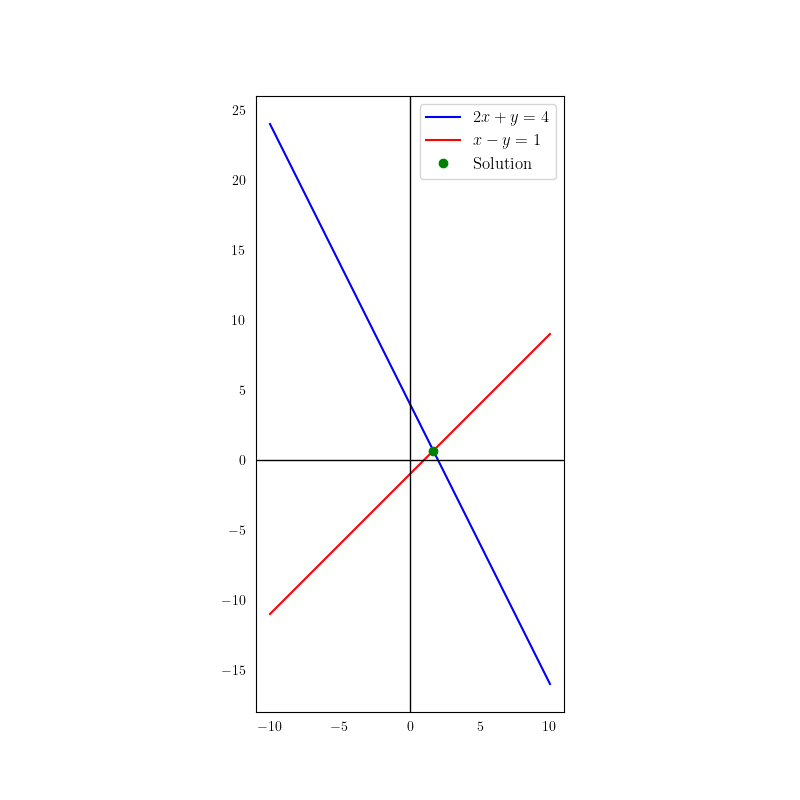

In [45]:
A = np.array([[2,1],[1,-1]])
b = np.array([[4],[1]])

show_equations(A,b)
plotting_2D_solution(A, b)

## b) Infinite Solution

System of equations:


Eq(x1 - 2*x2, 1)

Eq(2*x1 - 4*x2, 2)

Augmented matrix form [A | b]:


Matrix([
[1, -2, 1],
[2, -4, 2]])

Infinite solutions


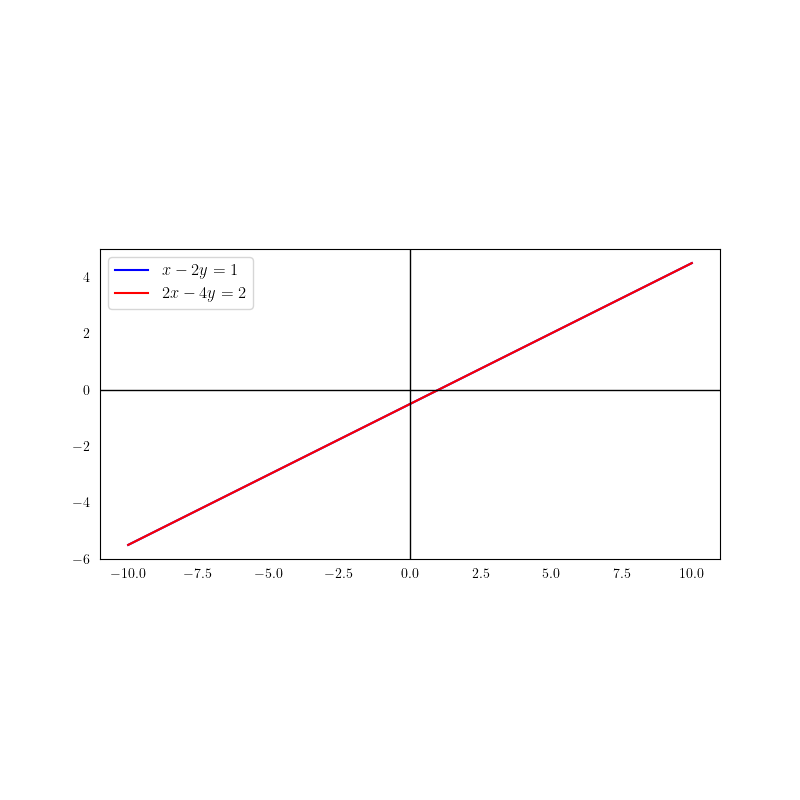

In [46]:
A = np.array([[1,-2],[2,-4]])
b = np.array([[1],[2]])

show_equations(A,b)
plotting_2D_solution(A, b)

## c) No Solution

System of equations:


Eq(x1 - 2*x2, 1)

Eq(2*x1 - 4*x2, 3)

Augmented matrix form [A | b]:


Matrix([
[1, -2, 1],
[2, -4, 3]])

No solution


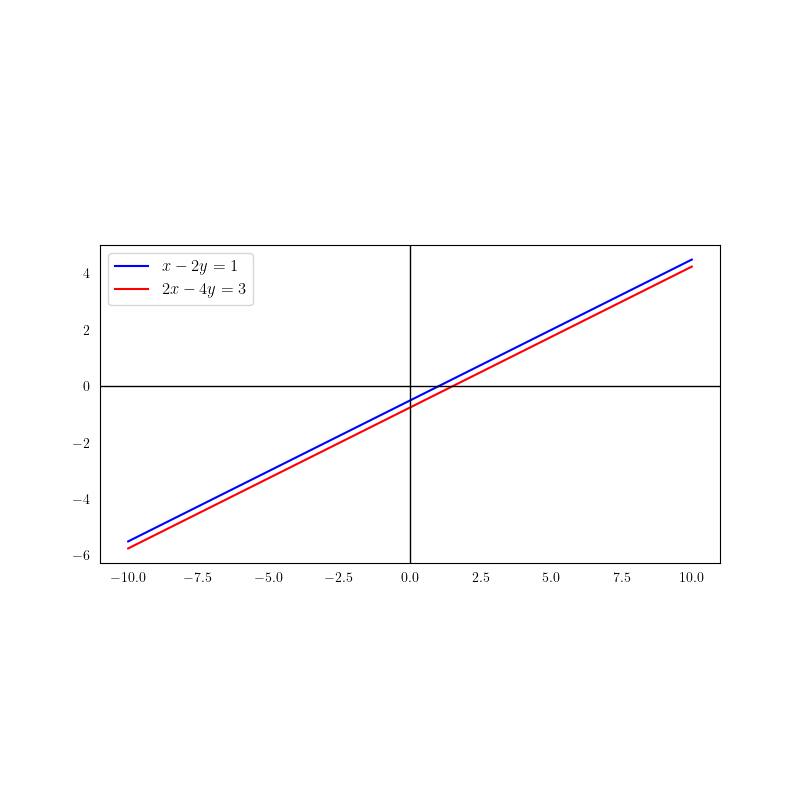

In [47]:
A = np.array([[1,-2],[2,-4]])
b = np.array([[1],[3]])

show_equations(A,b)
plotting_2D_solution(A, b)

# **Plotting 3D Solution**

## a) Unique Solution

System of equations:


Eq(x1 + x2 + x3, 6)

Eq(2*x1 - x2 + x3, 3)

Eq(x1 + 2*x2 - x3, 2)

Augmented matrix form [A | b]:


Matrix([
[1,  1,  1, 6],
[2, -1,  1, 3],
[1,  2, -1, 2]])

One solution [1. 2. 3.]


Matrix([
[1.0],
[2.0],
[3.0]])

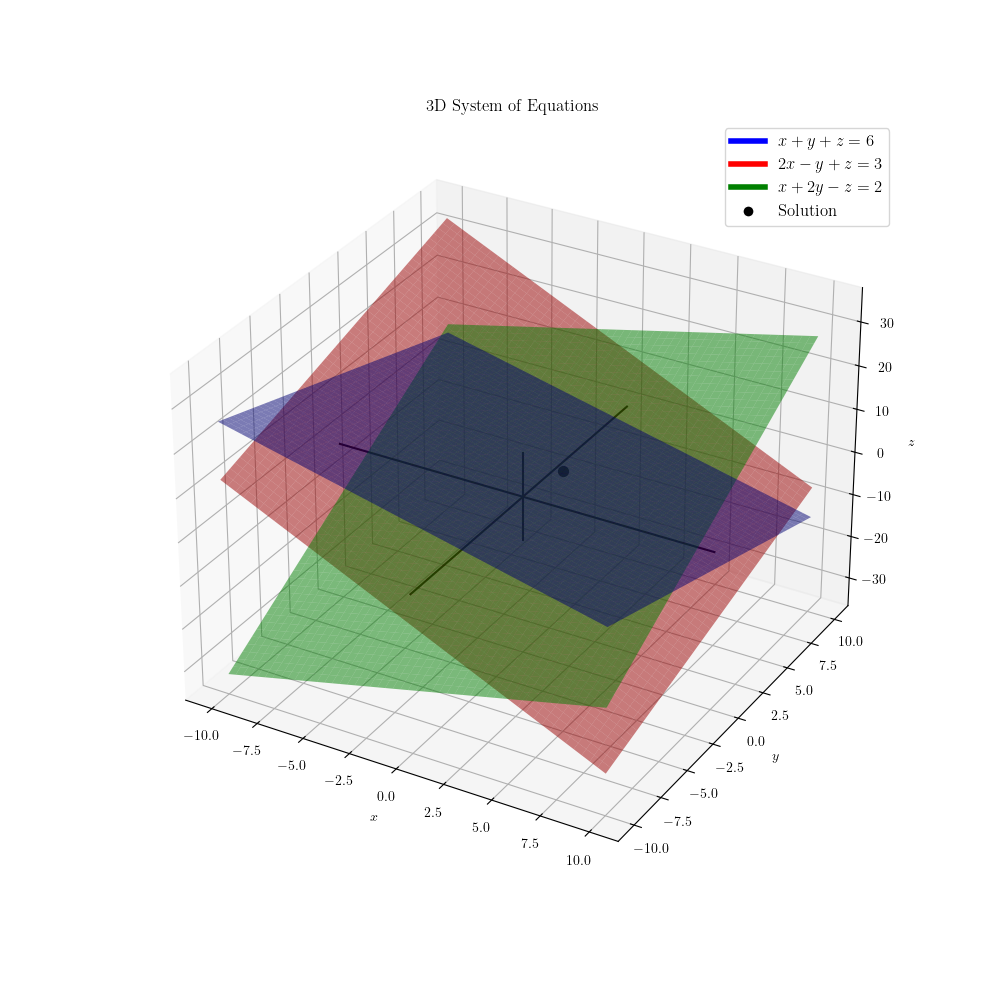

In [48]:
A = np.array([[1,1,1],[2,-1,1],[1,2,-1]])
b = np.array([[6],[3],[2]])

show_equations(A,b)
plotting_3D_solution(A, b)

## b) No Solution

System of equations:


Eq(x1 + x2 + x3, 6)

Eq(2*x1 + 2*x2 + 2*x3, 10)

Eq(x1 - x2, 1)

Augmented matrix form [A | b]:


Matrix([
[1,  1, 1,  6],
[2,  2, 2, 10],
[1, -1, 0,  1]])

No solution


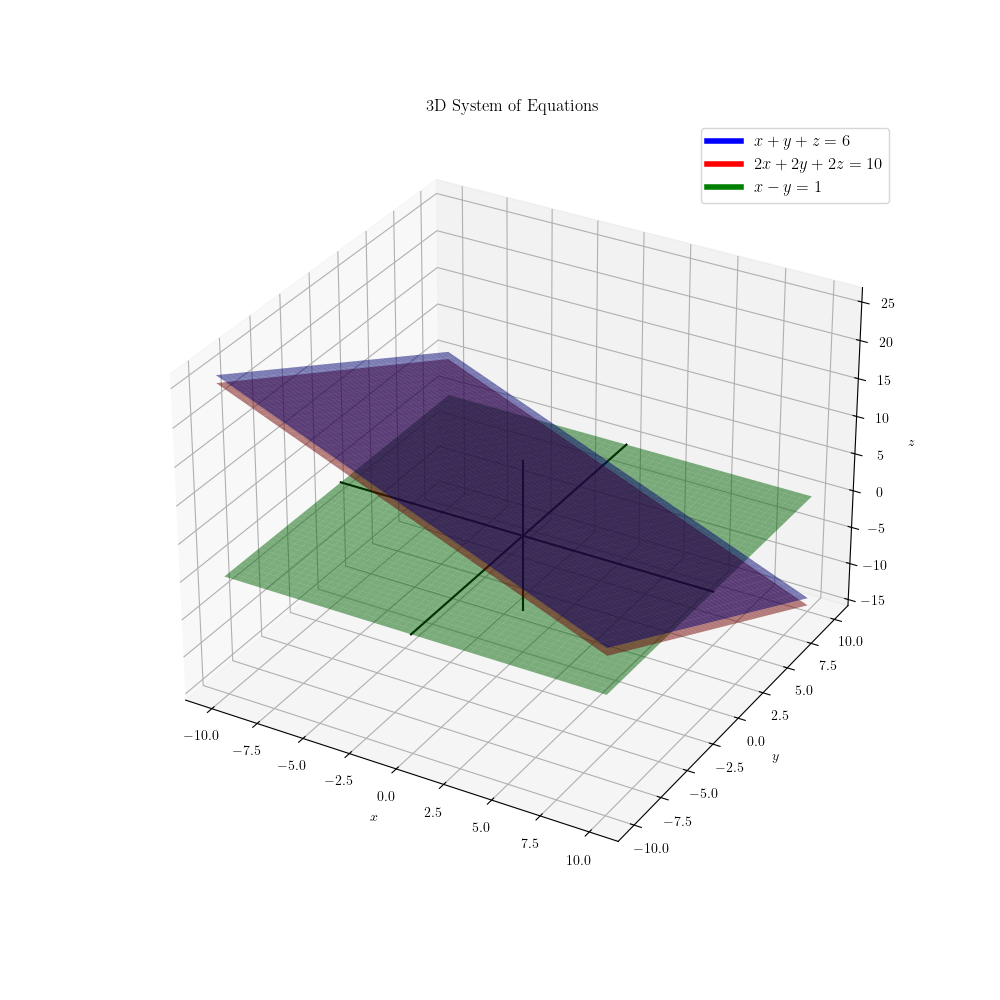

In [49]:
A = np.array([[1,1,1],[2,2,2],[1,-1,0]])
b = np.array([[6],[10],[1]])

show_equations(A,b)
plotting_3D_solution(A, b)

## c) Infinite Solution

System of equations:


Eq(x1 + x2 + x3, 6)

Eq(2*x1 + 2*x2 + 2*x3, 12)

Eq(3*x1 + 3*x2 + 3*x3, 18)

Augmented matrix form [A | b]:


Matrix([
[1, 1, 1,  6],
[2, 2, 2, 12],
[3, 3, 3, 18]])

Infinite solutions


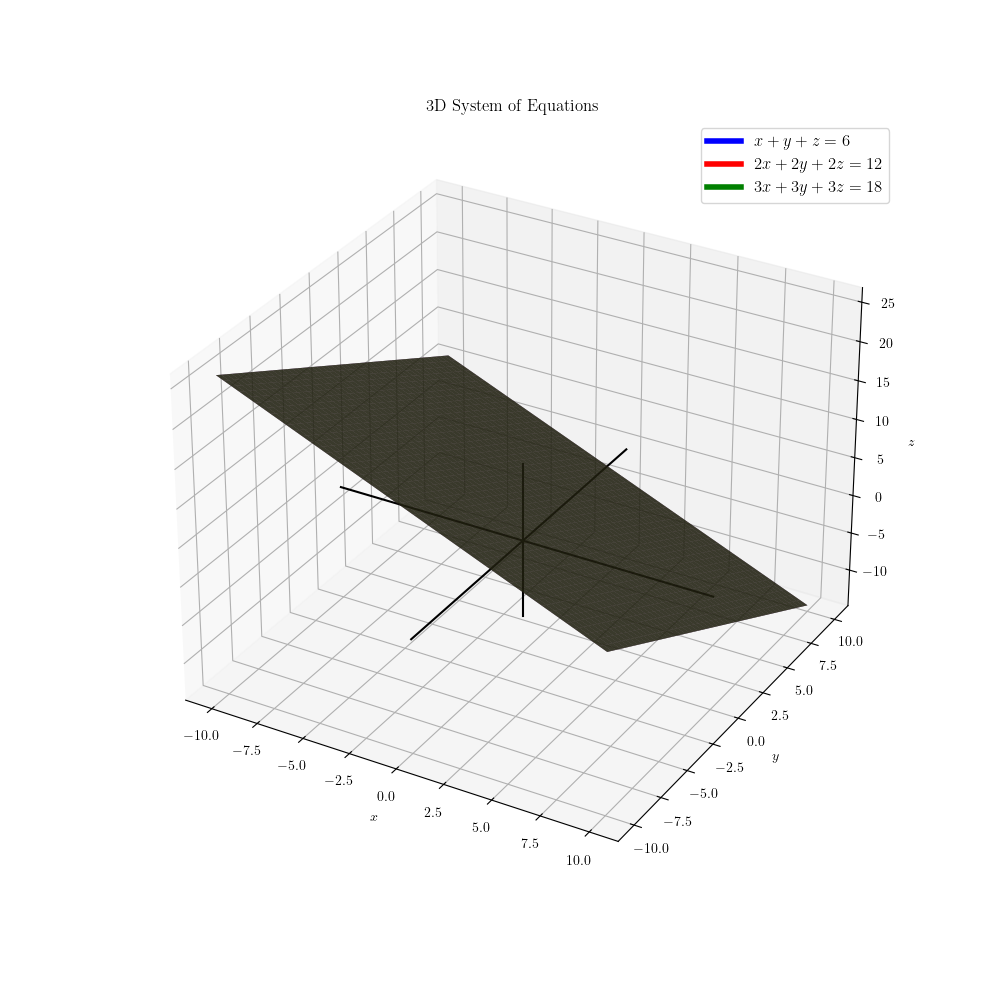

In [50]:
A = np.array([[1,1,1],[2,2,2],[3,3,3]])
b = np.array([[6],[12],[18]])

show_equations(A,b)
plotting_3D_solution(A, b)

# **Homogenous Equation**

## a) Trivial Solution

System of equations:


Eq(x1 + x2, 0)

Eq(x1 - x2, 0)

Augmented matrix form [A | b]:


Matrix([
[1,  1, 0],
[1, -1, 0]])

One solution [ 0. -0.]


Matrix([
[0.0],
[0.0]])

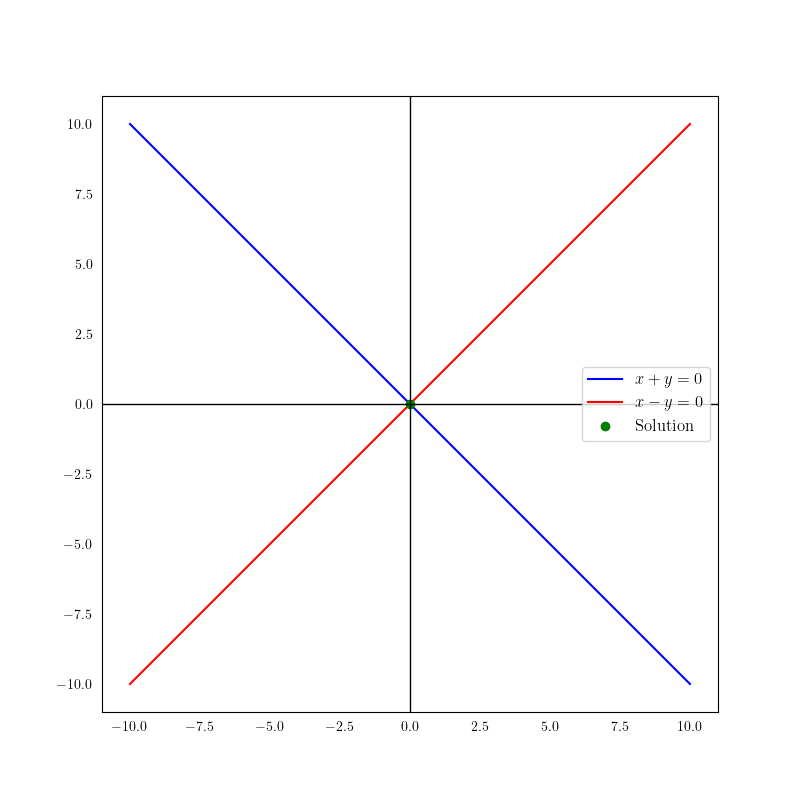

In [51]:
A = np.array([[1,1],[1,-1]])
b = np.array([[0],[0]])

show_equations(A,b)
plotting_2D_solution(A, b)

## b) Non Trivial Solution

System of equations:


Eq(x1 + x2, 0)

Eq(2*x1 + 2*x2, 0)

Augmented matrix form [A | b]:


Matrix([
[1, 1, 0],
[2, 2, 0]])

Infinite solutions


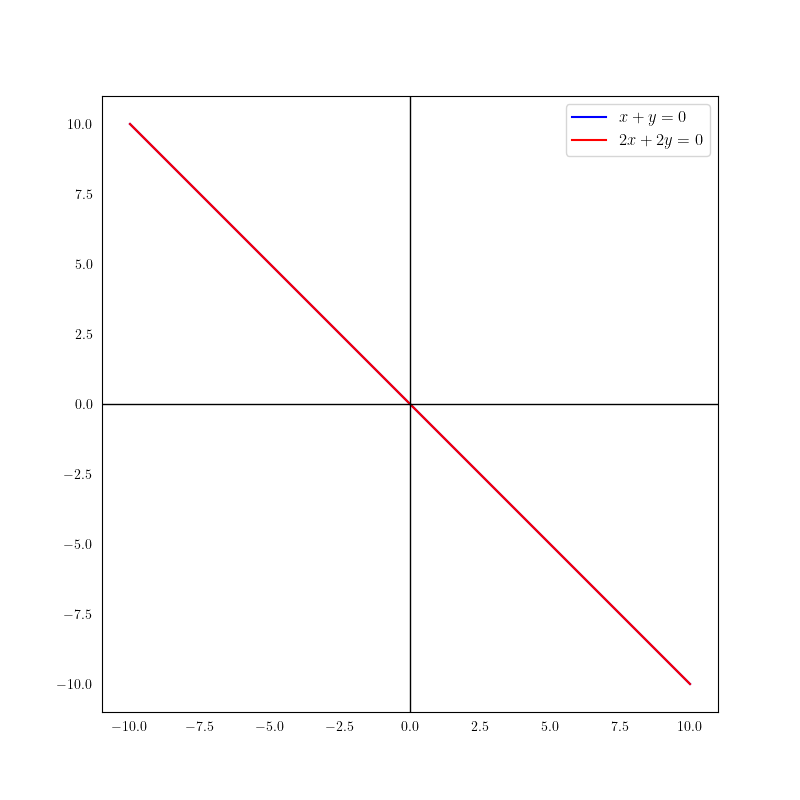

In [52]:
A = np.array([[1,1],[2,2]])
b = np.array([[0],[0]])

show_equations(A,b)
plotting_2D_solution(A, b)